In [57]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split 
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error
import seaborn as sns
import numpy
import pandas as pd
import matplotlib.pyplot as plt 

In [58]:
seed = 7
numpy.random.seed(seed)

In [59]:
# Get Data From the data set
dataframe = pd.read_csv(r'D:\InfernoPrediction\SpreadPrediction\forestfires.csv')

In [60]:
# Pre Processing

# Replacing Month and date to numbers
dataframe.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
dataframe.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)

In [61]:
# Describe dataset
print(dataframe.describe())

                X           Y       month         day        FFMC         DMC  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean     4.669246    4.299807    7.475822    4.259188   90.644681  110.872340   
std      2.313778    1.229900    2.275990    2.072929    5.520111   64.046482   
min      1.000000    2.000000    1.000000    1.000000   18.700000    1.100000   
25%      3.000000    4.000000    7.000000    2.000000   90.200000   68.600000   
50%      4.000000    4.000000    8.000000    5.000000   91.600000  108.300000   
75%      7.000000    5.000000    9.000000    6.000000   92.900000  142.400000   
max      9.000000    9.000000   12.000000    7.000000   96.200000  291.300000   

               DC         ISI        temp          RH        wind        rain  \
count  517.000000  517.000000  517.000000  517.000000  517.000000  517.000000   
mean   547.940039    9.021663   18.889168   44.288201    4.017602    0.021663   
std    248.066192    4.5594

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4F82DD208>,
      dtype=object)

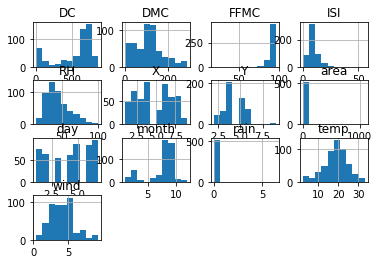

In [62]:
# Generating Graphs for Each Attribute
dataframe.hist()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001E4F8792898>,
      dtype=object)

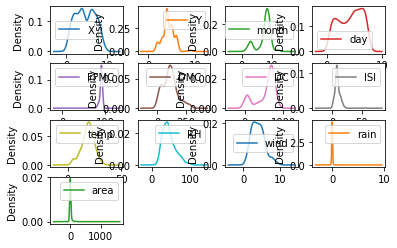

In [63]:
dataframe.plot(kind='density', subplots=True, layout=(4,4), sharex=False, sharey=False)

In [64]:
# Put attributes that couses for the forest fires area to X and put number of areas burnt to y axis
dataset = dataframe.values
X = dataframe[['temp','RH','wind','FFMC','DMC','DC']]
Y = dataframe['area']

In [65]:
# GEt Correlatois
x_correlations = X.corr()
x_correlations

,temp,RH,wind,FFMC,DMC,DC
temp,1.000000,-0.527390,-0.227116,0.431532,0.469594,0.496208
RH,-0.527390,1.000000,0.069410,-0.300995,0.073795,-0.039192
wind,-0.227116,0.069410,1.000000,-0.028485,-0.105342,-0.203466
FFMC,0.431532,-0.300995,-0.028485,1.000000,0.382619,0.330512
DMC,0.469594,0.073795,-0.105342,0.382619,1.000000,0.682192
DC,0.496208,-0.039192,-0.203466,0.330512,0.682192,1.000000


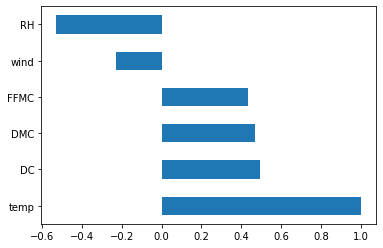

In [66]:
(x_correlations
      .temp
      .sort_values(ascending=False)
      .plot
      .barh())
# Temperature is the most correalted one to the burnt area

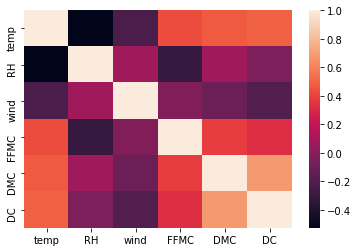

In [67]:
x_heat = sns.heatmap(x_correlations)

In [68]:
# Since FFMC,DMC and DC are also calculated by the Temp,Wind Speed and RH remove them
dataset = dataframe.values
X = dataframe[['temp','RH','wind']]
Y = dataframe['area']

In [69]:
# Watch co realtions again
x_correlations = X.corr()

In [70]:
x_correlations

,temp,RH,wind
temp,1.000000,-0.52739,-0.227116
RH,-0.527390,1.00000,0.069410
wind,-0.227116,0.06941,1.000000


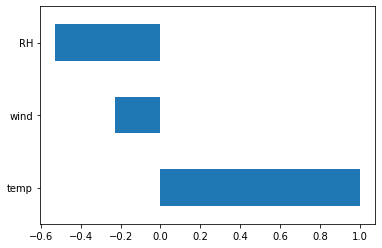

In [71]:
(x_correlations
      .temp
      .sort_values(ascending=False)
      .plot
      .barh())

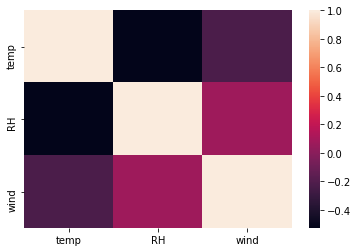

In [72]:
x_heat = sns.heatmap(x_correlations)

In [73]:
# Split 0.3 from the daa set to test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

In [74]:
algorithms = []
algorithms.append(('LinearRegression', LinearRegression()))
algorithms.append(('BaggingRegressor', BaggingRegressor()))
algorithms.append(('RandomForest', RandomForestRegressor()))
algorithms.append(('KNeighbours', KNeighborsRegressor()))


# Evaluations
results = []
names = []


for name,model in algorithms:
    
#     Fit data to the model
    model.fit(X,Y)
    
#     PRedict data
    predictions = model.predict(X)
    
#     GEt Varice
    variance = explained_variance_score(Y, predictions)
#     Get mean absolute error
    meanError = mean_absolute_error(predictions, Y)
    results.append(meanError)
    names.append(name) 
#     Display result
    result = "%s: %f (%f)" % (name,variance, meanError)
    print(result)
    

LinearRegression: 0.011509 (19.171769)
BaggingRegressor: 0.811023 (8.596886)
RandomForest: 0.843971 (7.903287)
KNeighbours: 0.268687 (15.501118)


In [75]:
# Since BaggingRegressor has highest accuracy we take it for the predictions

# GEt data from the Predicted data sets
def fahToCel(value):
     return ((float(value)-32) * 5/9)
    
def mphToKmph(value):
    return value*1.60934

f1 = open("windSpeed.txt", "r")
line1=f1.readlines()
f2 = open("temperatures.txt", "r")
line2=f2.readlines()
f3 = open("Relativehumidity.txt", "r")
line3=f3.readlines()

# Write Data in to a File
f = open("spreads.txt", "a")

regressor = RandomForestRegressor()
regressor.fit(X,Y)
predictions = regressor.predict(X)

for i in range(180):
    
    temp=float(line2[i])
    speed=float(line1[i])
    
    #     Convert Temperature to Cel
    temp=fahToCel(temp)
    #     Convert Speed to KMPH
    speed=mphToKmph(speed)
    
    rh=float(line3[i])
    
# Input Values to the model
    new_input=[[temp,rh,speed]]
#     Get Outputs
    output=regressor.predict(new_input)
    
#     Write each output in to a file
    f.write(str(output[0]))
    f.write("\n")
    
f.close()
    
    
    
    
    